In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young's modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

In [3]:
n = 6; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
A = sparse(N,N); % generating a sparse matrix

format short e
% Define the RHS of the system
f = h^4*((-w/E*I)-((rho*g)/(E*I))*sin((pi/L)*[0:h:L]'));
f(1) = 0;
f(N) = f(N)/2;

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Left end
A(1,1) = 1;
A(2,2) = 7;
A(1,2) = 0;
A(1,3) = 0;
A(2,1) = 0;
A(3,1) = 0;
A(2,3) = -4;
A(2,4) = 1;

% Right end
A(N,N) = 1;
A(N-1,N-1) =  5;
A(N-1,N) = -2;
A(N-2,N) = 1;
A(N, N-1) = -2;
A(N, N-2) = 1;
A(N-1,N-2) = -4;
A(N-1,N-3) = 1;

% Solve for y
y = A\f;

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2)-((rho*g*L)/(E*I*pi))*((L^3/pi^3)*sin((pi*x)/L)-x.^3/6 + (L*x.^2)/2-(L^2*x)/pi^2);;
ErrMax = max(abs(y-y_exact))

ErrMax =   5.9514e+000


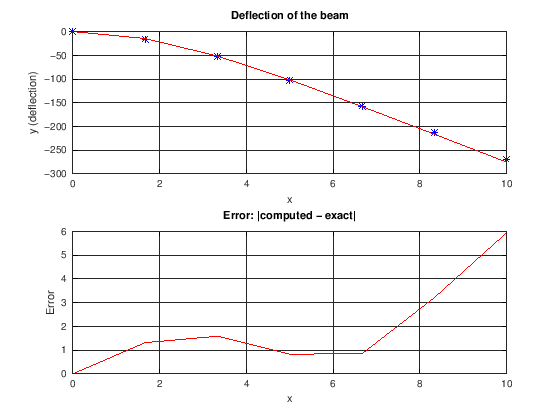

In [5]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;